In [1]:
import pickle
import dgl
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Load the saved graph file
file_path = './data/Multi Level Jet Tagging/Emitter-Higgs.pkl' 

try:
    with open(file_path, 'rb') as f:
        graphs = pickle.load(f)
    print(f"File loaded successfully! Total number of graphs: {len(graphs)}")
except Exception as e:
    print(f"Failed to load the file: {e}")
    exit()

/media/drive1/jettag/env_jet/lib/python3.10/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))


File loaded successfully! Total number of graphs: 499985


Frequency distribution of connected components:
1    48.450454
2    35.643069
3    12.538376
4     2.873086
5     0.433013
6     0.054002
7     0.008000
Name: proportion, dtype: float64


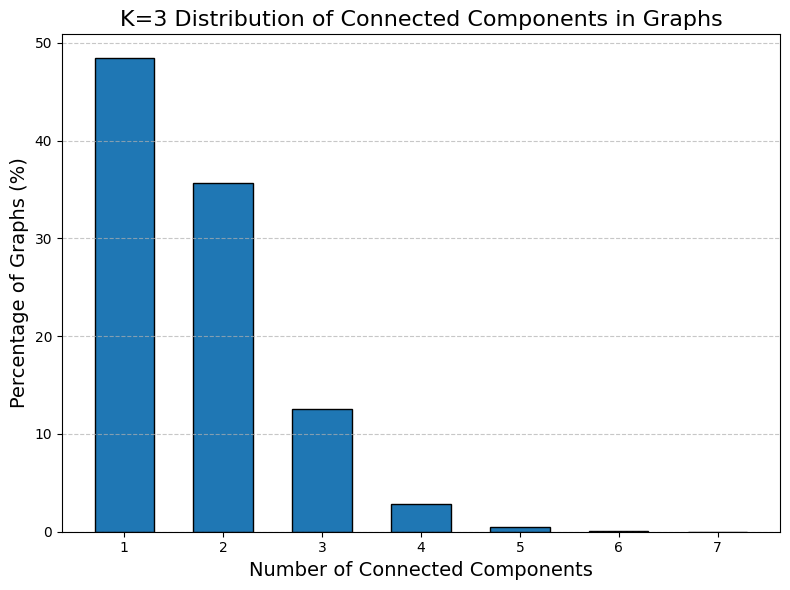

Results saved to ./connected_components_analysis.csv
Connected Components Frequency Analysis:
   Number of Connected Components  Percentage of Graphs
0                               1             48.450454
1                               2             35.643069
2                               3             12.538376
3                               4              2.873086
4                               5              0.433013
5                               6              0.054002
6                               7              0.008000


In [2]:
# Function to count connected components
def count_connected_components(dgl_graph):
    nx_graph = dgl.to_networkx(dgl_graph)  # Convert DGL graph to NetworkX
    undirected_graph = nx_graph.to_undirected()  # Convert to undirected graph
    return nx.number_connected_components(undirected_graph)  # Count the number of connected components

# Analyze all graphs
graph_analysis = []
for i, graph in enumerate(graphs):
    num_components = count_connected_components(graph)
    graph_analysis.append(num_components)

# Calculate frequency distribution of connected components
component_counts = pd.Series(graph_analysis).value_counts(normalize=True) * 100
component_counts = component_counts.sort_index()

# Display frequency distribution
print("Frequency distribution of connected components:")
print(component_counts)

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.bar(component_counts.index, component_counts.values, width=0.6, edgecolor='black')
plt.xlabel('Number of Connected Components', fontsize=14)
plt.ylabel('Percentage of Graphs (%)', fontsize=14)
plt.title('K=3 Distribution of Connected Components in Graphs', fontsize=16)
plt.xticks(component_counts.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Save the results to a DataFrame
results_df = pd.DataFrame({
    'Number of Connected Components': component_counts.index,
    'Percentage of Graphs': component_counts.values
})

# Save to a CSV file
csv_path = './connected_components_analysis.csv'
results_df.to_csv(csv_path, index=False)
print(f"Results saved to {csv_path}")

# Display the DataFrame
print("Connected Components Frequency Analysis:")
print(results_df)


In [3]:
# Identify graphs with exactly the target number of connected components
target_component_count = 7
indices = [i for i, count in enumerate(graph_analysis) if count == target_component_count]

# Limit to the first 5 graphs that match the condition
max_graphs_to_show = 3
selected_indices = indices[:max_graphs_to_show]  # Select only the first 5
graphs_with_target_components = [graphs[i] for i in selected_indices]

print(f"Found {len(indices)} graphs with exactly {target_component_count} connected components.")
print(f"Displaying the first {len(graphs_with_target_components)} graphs.")

Found 40 graphs with exactly 7 connected components.
Displaying the first 3 graphs.


Visualizing the first 3 graphs with exactly 7 connected components...
Graph 17372 - 7 connected components


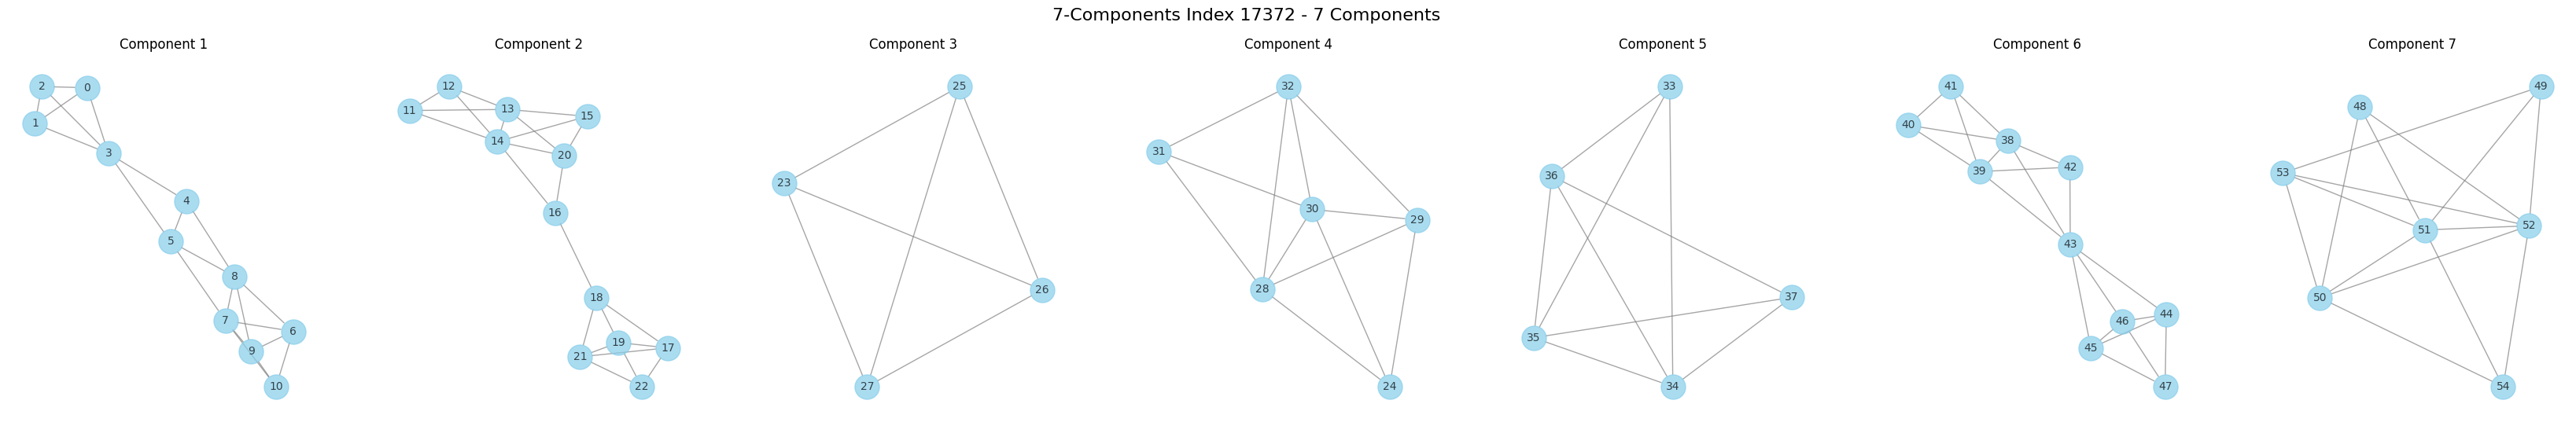

Graph 26875 - 7 connected components


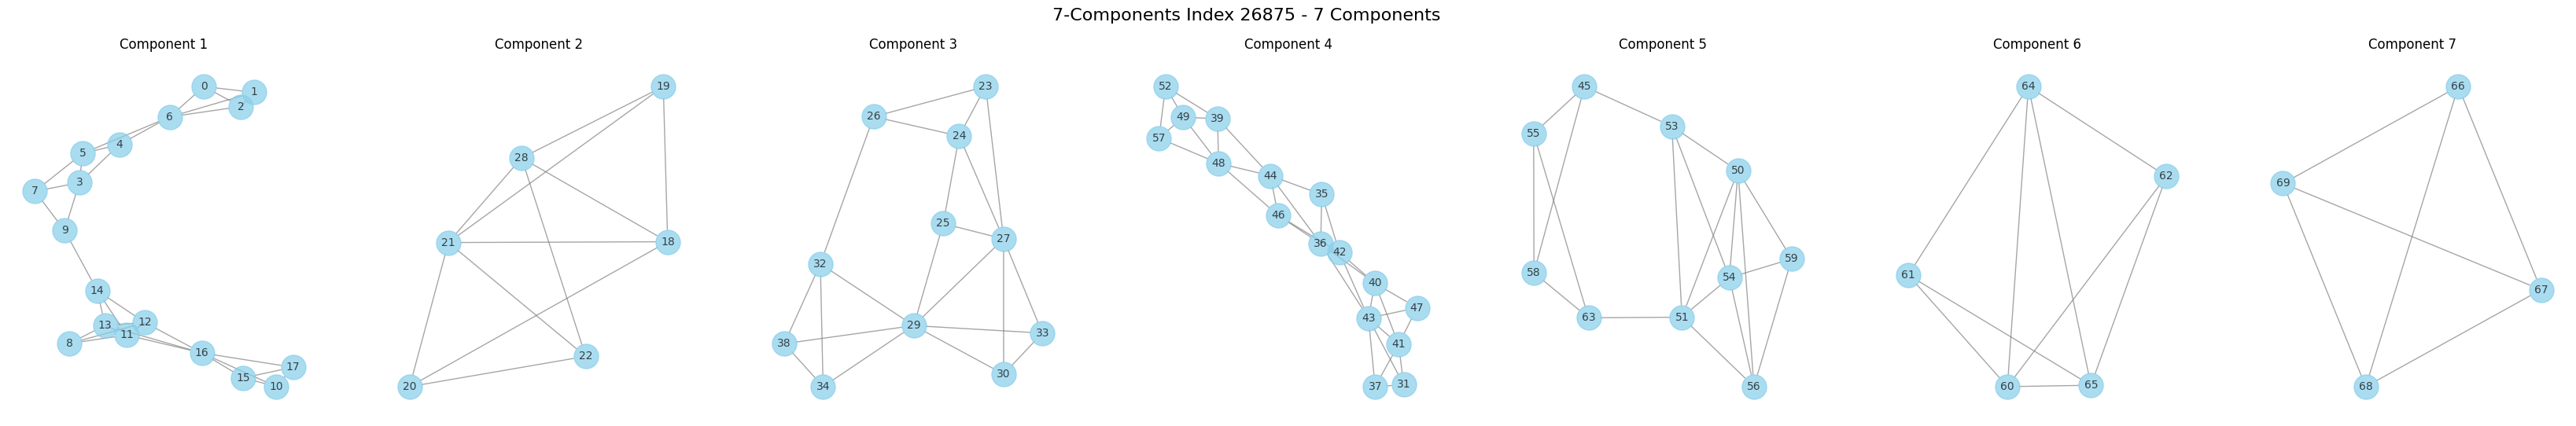

Graph 28952 - 7 connected components


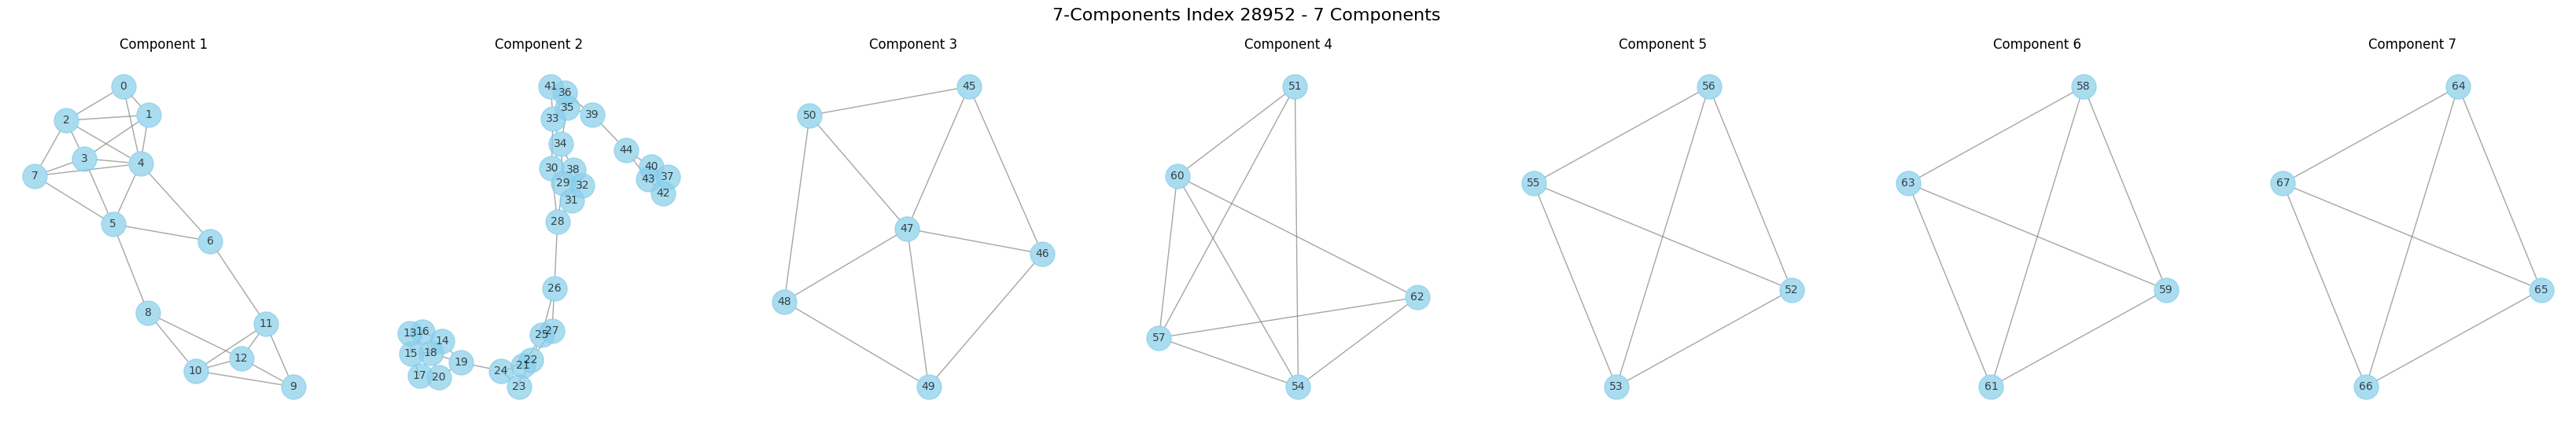

In [4]:
import matplotlib.pyplot as plt
import networkx as nx

# Function to visualize graphs with separated components
def visualize_graph_with_separate_components(graphs, indices, title_prefix="Graph"):
    for graph_idx, g in zip(indices, graphs):
        nx_graph = g.to_networkx()
        undirected_graph = nx_graph.to_undirected()  # Convert to undirected for component detection
        components = list(nx.connected_components(undirected_graph))  # Get individual components

        print(f"Graph {graph_idx} - {len(components)} connected components")

        fig, axes = plt.subplots(1, len(components), figsize=(6 * len(components), 6))
        
        if len(components) == 1:
            axes = [axes]  # Ensure consistent indexing if there's only one component

        for ax, component in zip(axes, components):
            subgraph = undirected_graph.subgraph(component)  # Extract the subgraph for this component
            pos = nx.spring_layout(subgraph, seed=42)  # Generate layout for subgraph
            ax.set_title(f"Component {components.index(component)+1}", fontsize=12)
            nx.draw(
                subgraph, pos, ax=ax,
                with_labels=True,
                node_size=500,
                node_color="skyblue",
                font_size=10,
                edge_color="gray",
                alpha=0.7
            )

        plt.suptitle(f"{title_prefix} Index {graph_idx} - {len(components)} Components", fontsize=16)
        plt.show()

# Visualizing the first 5 graphs with exactly 7 components
if graphs_with_target_components:
    print(f"Visualizing the first {len(graphs_with_target_components)} graphs with exactly {target_component_count} connected components...")
    visualize_graph_with_separate_components(graphs_with_target_components, selected_indices, f"{target_component_count}-Components")
else:
    print(f"No graphs found with exactly {target_component_count} connected components.")


Visualizing the first 3 graphs with exactly 7 connected components...
Graph 17372 - 7 connected components


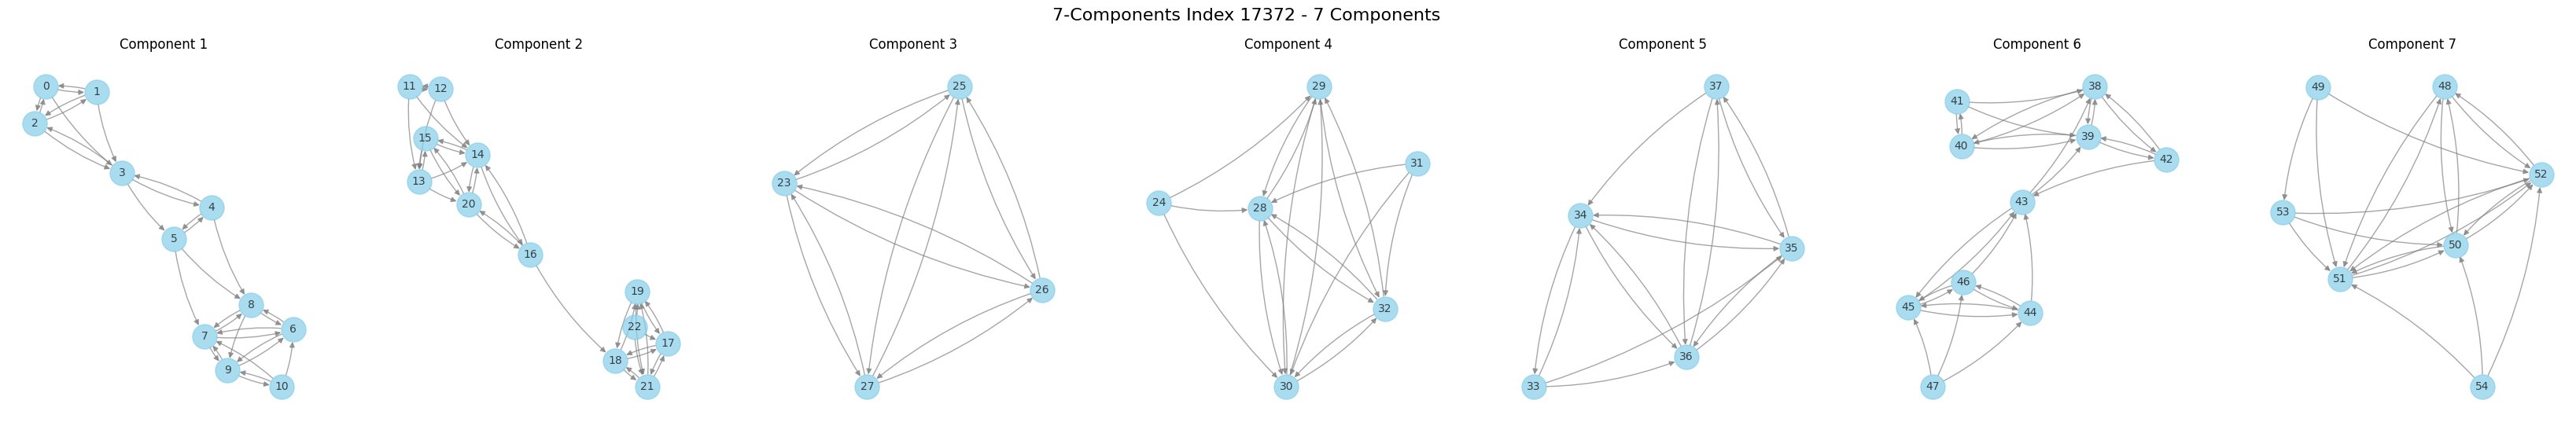

Graph 26875 - 7 connected components


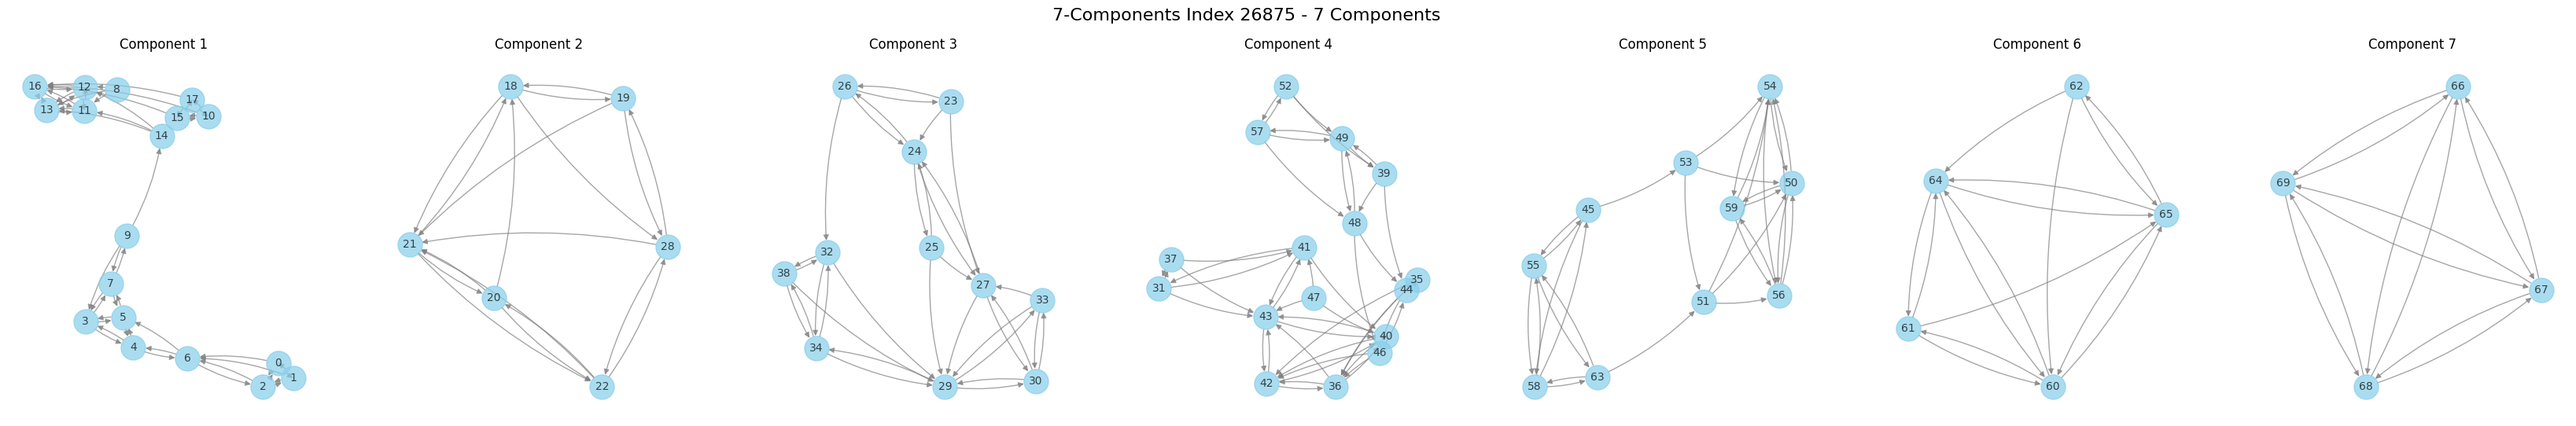

Graph 28952 - 7 connected components


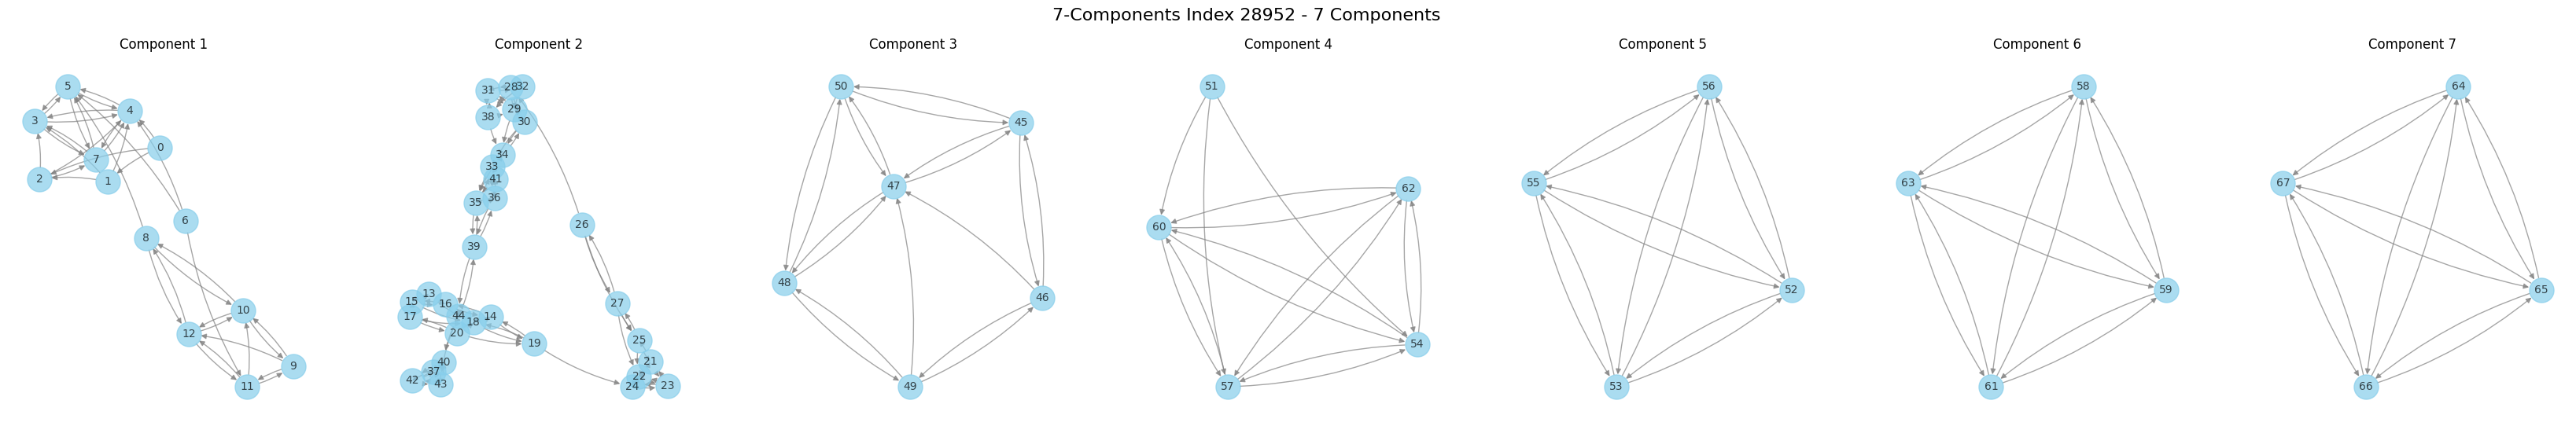

In [5]:
import matplotlib.pyplot as plt
import networkx as nx

# Function to visualize graphs with separated components while keeping directionality
def visualize_directed_graph_with_components(graphs, indices, title_prefix="Graph"):
    for graph_idx, g in zip(indices, graphs):
        nx_graph = g.to_networkx()  # Convert DGL graph to NetworkX
        directed_graph = nx.DiGraph(nx_graph)  # Ensure it's a directed graph
        components = list(nx.weakly_connected_components(directed_graph))  # Get weakly connected components

        print(f"Graph {graph_idx} - {len(components)} connected components")

        fig, axes = plt.subplots(1, len(components), figsize=(6 * len(components), 6))
        
        if len(components) == 1:
            axes = [axes]  # Ensure consistent indexing if there's only one component

        for ax, component in zip(axes, components):
            subgraph = directed_graph.subgraph(component)  # Extract the subgraph for this component
            pos = nx.spring_layout(subgraph, seed=42)  # Generate layout for subgraph
            ax.set_title(f"Component {components.index(component)+1}", fontsize=12)
            
            # Draw the directed graph
            nx.draw(
                subgraph, pos, ax=ax,
                with_labels=True,
                labels={node: node for node in subgraph.nodes()},
                node_size=500,
                node_color="skyblue",
                font_size=10,
                edge_color="gray",
                alpha=0.7,
                arrows=True,  # Keep arrows to show directionality
                connectionstyle="arc3,rad=0.1"  # Add curvature to edges for better visibility
            )

        plt.suptitle(f"{title_prefix} Index {graph_idx} - {len(components)} Components", fontsize=16)
        plt.show()

# Visualizing the first 5 graphs with exactly 7 components (keeping directionality)
if graphs_with_target_components:
    print(f"Visualizing the first {len(graphs_with_target_components)} graphs with exactly {target_component_count} connected components...")
    visualize_directed_graph_with_components(graphs_with_target_components, selected_indices, f"{target_component_count}-Components")
else:
    print(f"No graphs found with exactly {target_component_count} connected components.")



Graph at index 499981 has 3 connected components.

Graph 499981 - 3 connected components


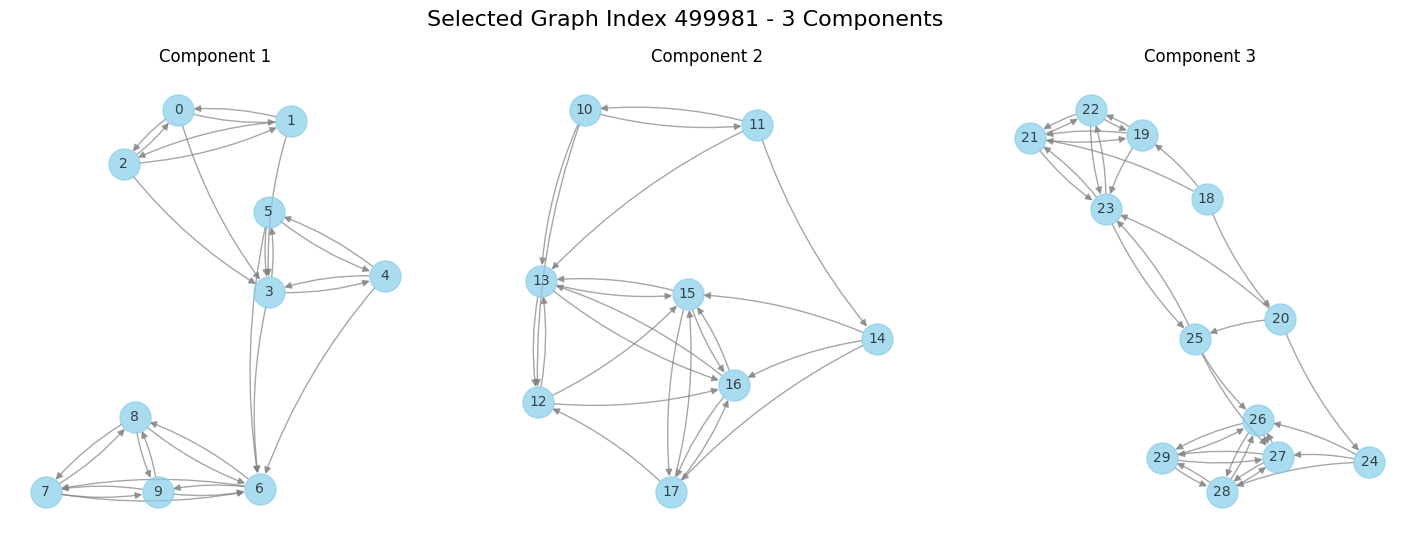

In [6]:
# Function to display the number of connected components and visualize the given graph index
graph_index = 499981
def analyze_and_visualize_graph_by_index(graphs, graph_analysis):
    while True:
        try:
            
            # Validate input
            if graph_index < 0 or graph_index >= len(graphs):
                print(f"Invalid index! Please enter a number between 0 and {len(graphs)-1}.")
                continue

            # Get the number of connected components
            num_components = graph_analysis[graph_index]
            print(f"\nGraph at index {graph_index} has {num_components} connected components.\n")

            # Extract and visualize the graph
            visualize_directed_graph_with_components([graphs[graph_index]], [graph_index], title_prefix="Selected Graph")

            break  # Exit loop after successful visualization

        except ValueError:
            print("Invalid input! Please enter an integer.")

# Run the function to analyze and visualize a graph by index
analyze_and_visualize_graph_by_index(graphs, graph_analysis)
